<a href="https://colab.research.google.com/github/arpit1729/ma22c007_2023_PL/blob/main/Assignments/Assignment_7/Predator_prey_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def ode_system(t, y, alpha, beta, delta, gamma): #This function is representing the system of ODEs for given question.
    r, x = y
    return np.array([alpha * r - beta * r * x, delta * r * x - gamma * x])

In [3]:
alpha = 1.1
beta = 0.4
delta = 0.1
gamma = 0.1

In [4]:
#useing the solve_ivp function for solveing the given system of ODEs.
solution = solve_ivp(ode_system, [0,70], [5, 2], args=(alpha, beta, delta, gamma),t_eval=np.linspace(0, 70, 1000))


Text(0, 0.5, 'populations')

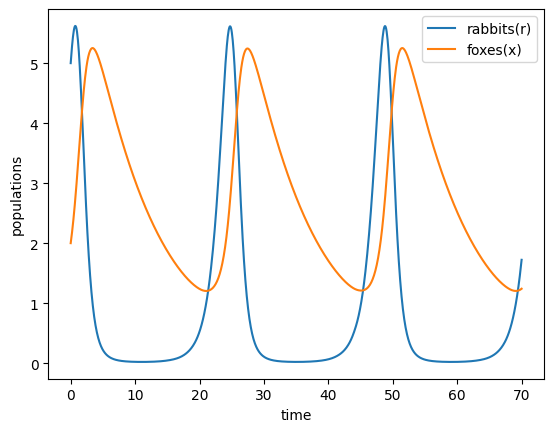

In [5]:
# createing a plot to visualizing the results.
fig = plt.figure(); ax = fig.gca()
curves = ax.plot(solution.t, solution.y.T)
ax.legend(curves, ['rabbits(r)', 'foxes(x)']);
plt.xlabel('time')
plt.ylabel('populations')

In [8]:
def ivpplot(initial_cond=[5,2]):
  """ input is 'initial cond=[r0,x0]'"""
  plt.figure(figsize=(8, 8))
  initial_conditions = initial_cond
  solution = solve_ivp(ode_system, [0,70], initial_conditions, args=(alpha, beta, delta, gamma), t_eval=np.linspace(0, 70, 1000))
  plt.plot(solution.y[1], solution.y[0], label=f'Initial: ({initial_conditions[1]:.2f}, {initial_conditions[0]:.2f})')
  plt.xlabel('Foxes (x)')
  plt.ylabel('Rabbits (r)')
  plt.legend()
  plt.title('Phase Portrait of Rabbit and Fox Population Dynamics')
  plt.grid(True)
  plt.show()

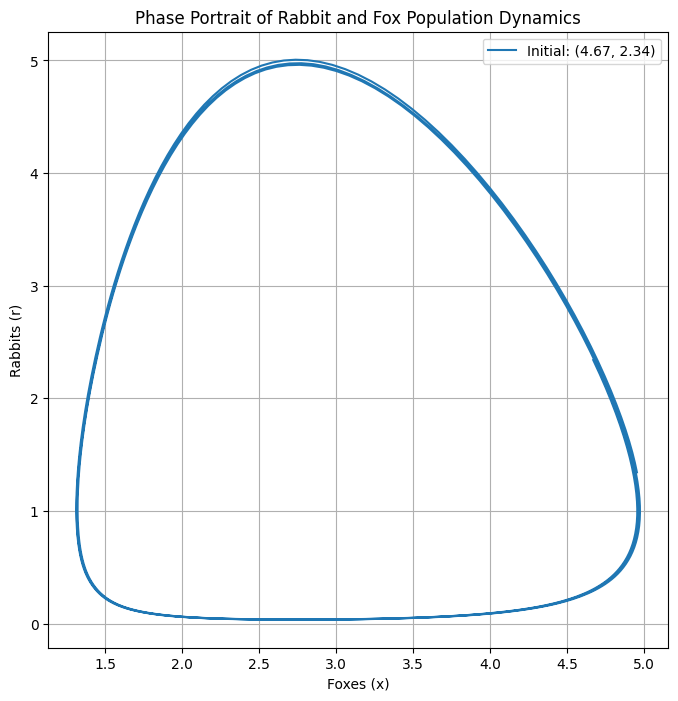

In [9]:
ivpplot([2.34,4.67])

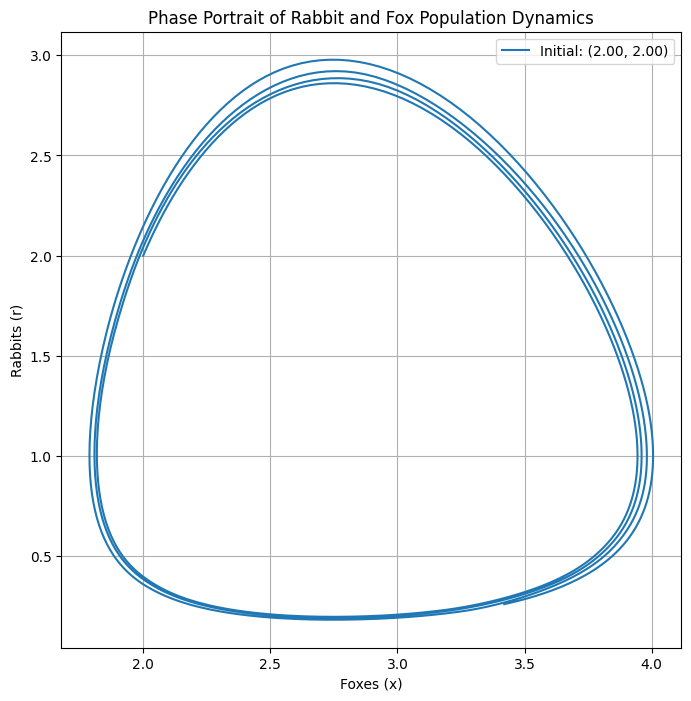

In [10]:
ivpplot([2,2])

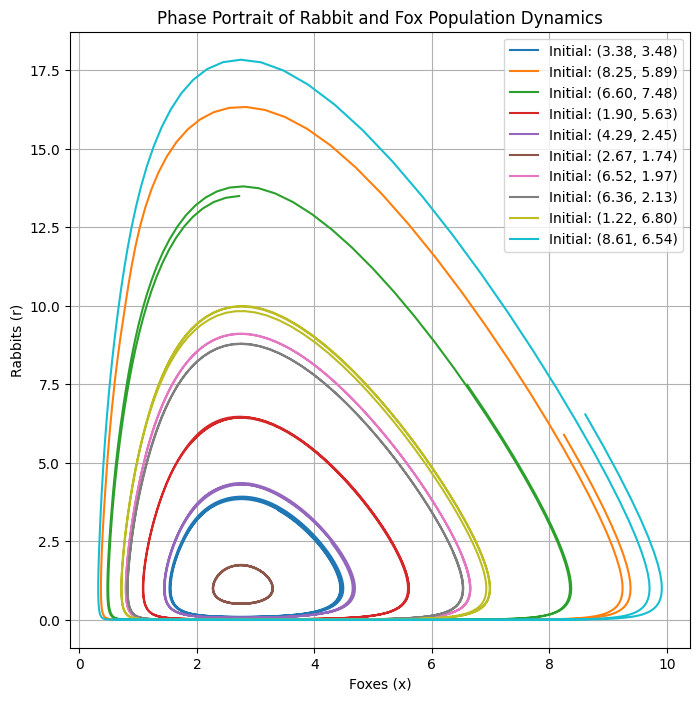

In [11]:
# Createing a function for generateing random initial conditions
def random_initial_conditions():
    r0 = np.random.uniform(1, 9)
    x0 = np.random.uniform(1, 9)
    return [r0, x0]
plt.figure(figsize=(8, 8))
for count in range(10):
    initial_conditions = random_initial_conditions()
    solution = solve_ivp(ode_system, [0,70], initial_conditions, args=(alpha, beta, delta, gamma), t_eval=np.linspace(0, 70, 1000))
    plt.plot(solution.y[1], solution.y[0], label=f'Initial: ({initial_conditions[1]:.2f}, {initial_conditions[0]:.2f})')
plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.legend()
plt.title('Phase Portrait of Rabbit and Fox Population Dynamics')
plt.grid(True)
plt.show()

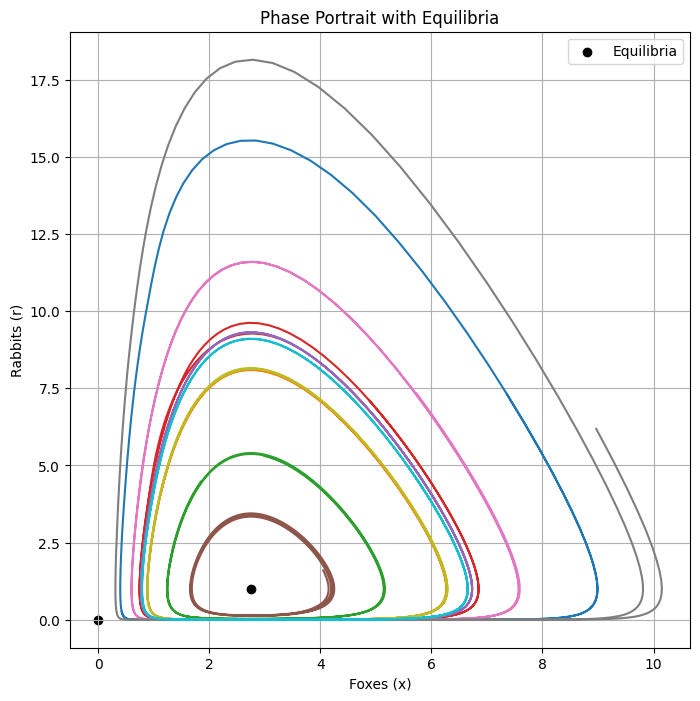

In [12]:
equilibria = [
    [0, alpha / beta],
    [0,gamma / delta ]
    ]
# Ploting the phase portrait
plt.figure(figsize=(8, 8))

for _ in range(10):
    initial_conditions = random_initial_conditions()
    solution = solve_ivp(ode_system, [0,70], initial_conditions, args=(alpha, beta, delta, gamma), t_eval=np.linspace(0, 70, 1000))
    plt.plot(solution.y[1], solution.y[0])
# Ploting the equilibria
plt.scatter(equilibria[0], equilibria[1], color='black', marker='o', label='Equilibria')
plt.xlabel('Foxes (x)')
plt.ylabel('Rabbits (r)')
plt.legend()
plt.title('Phase Portrait with Equilibria')
plt.grid(True)
plt.show()